In [145]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import + read csv
application_df = pd.read_csv("Phishing_Legitimate_full (1).csv")
application_df.drop(columns=['id'], inplace=True)
application_df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [146]:
# Split our preprocessed data into our features and target arrays
target = application_df['CLASS_LABEL'] #thing/ column you trying to predict
features = application_df.drop('CLASS_LABEL', axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.7)
#test size is ratio of testing data to training data

In [147]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile train and evaluate the neural network model

In [148]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation='relu6', input_dim=len(X_train.columns)))
# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=20, activation='relu6'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='relu6'))    
# see the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                980       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1001 (3.91 KB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
#create callback every 5 epochs
checkpoint_path = "model_checkpoint/checkpoint_{epoch:02d}"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=5
)

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [150]:
# Train the model
model = nn.fit(X_train_scaled, y_train, epochs=16, callbacks=[checkpoint_callback], verbose=1)

Epoch 1/16


94/94 [==============================] - 0s 2ms/step - loss: 2.1373 - accuracy: 0.7057
Epoch 2/16
94/94 [==============================] - 0s 1ms/step - loss: 1.2392 - accuracy: 0.8227
Epoch 3/16
94/94 [==============================] - 0s 2ms/step - loss: 0.9134 - accuracy: 0.8510
Epoch 4/16
94/94 [==============================] - 0s 1ms/step - loss: 0.7420 - accuracy: 0.8523
Epoch 5/16
94/94 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.8690
Epoch 6/16
94/94 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.8897
Epoch 7/16
94/94 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.8977
Epoch 8/16
94/94 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.9050
Epoch 9/16
94/94 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.9157
Epoch 10/16
94/94 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.9203
Epoch 11/16
94/94 [===========

In [151]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

219/219 - 0s - loss: 0.3799 - accuracy: 0.9323 - 121ms/epoch - 552us/step
Loss: 0.37992164492607117, Accuracy: 0.932285726070404


In [152]:
from sklearn.metrics import confusion_matrix

# Predict classes using the testing data
# Predict probabilities using the testing data
y_pred_prob = nn.predict(X_test_scaled)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

219/219 [==============================] - 0s 307us/step
Confusion Matrix:
[[3218  228]
 [ 246 3308]]


In [153]:
# classification report to evaluate the model
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3446
           1       0.94      0.93      0.93      3554

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000



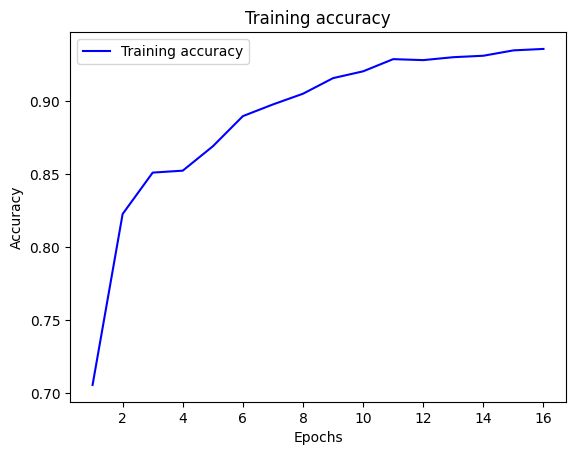

In [154]:
#visualize "xyz" using matplotlib 
# visualize the model's change in accuracy over each epoch
import matplotlib.pyplot as plt

# Get the model's accuracy and loss over epochs
accuracy = model.history['accuracy']
loss = model.history['loss']

# Create a range of epochs
epochs = range(1, len(accuracy) + 1)

# Plot accuracy over epochs
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

219/219 [==============================] - 0s 297us/step


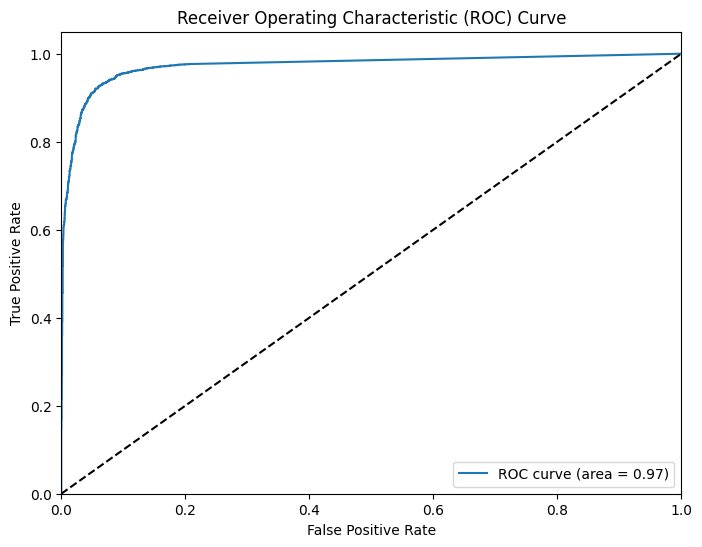

In [155]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = nn.predict(X_test_scaled)

# Calculate the fpr and tpr for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

219/219 [==============================] - 0s 304us/step


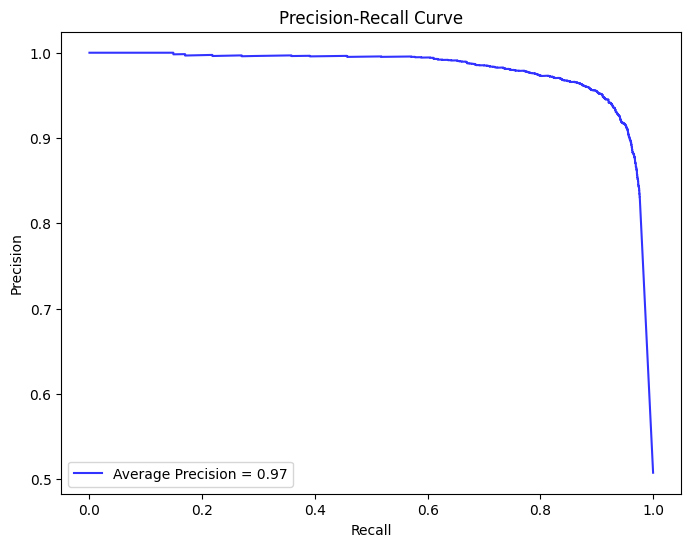

In [156]:
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = nn.predict(X_test_scaled)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculate average precision score
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', alpha=0.8, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [157]:
# export to HDF5
nn.save("AlphabetSoupCharity.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
